In [1]:
import glob
import pandas as pd
import mne
import matplotlib.pyplot as plt
from io import StringIO
import mne
from mne.io import read_raw_eeglab, read_epochs_eeglab
import numpy as np
from scipy import signal
from scipy import fftpack
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm, tqdm_notebook
import math

from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from keras_tqdm import TQDMNotebookCallback
from tensorboard.plugins.hparams import api as hp
from livelossplot.tf_keras import PlotLossesCallback

import autosklearn.regression
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import multiprocessing
from tpot import TPOTRegressor
from oct2py import octave

from joblib import Parallel, delayed
import multiprocessing
from joblib import wrap_non_picklable_objects
import json
import pickle
import os.path
from mpl_toolkits.mplot3d import axes3d
import timeit
from skimage.transform import resize
from timeit import default_timer as timer
from datetime import timedelta
import json

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.models import Model, load_model
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.utils import plot_model

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod import bayes_mixed_glm as glm

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV

from spectrum import arburg, arma2psd, pburg
import pylab
from scipy.signal import find_peaks
from scipy.integrate import simps

/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/pyparsing.py:3168: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [188]:
df_powers = pd.read_excel('131-csd-clean-v2.xlsx')
df_powers.shape

(2201, 979)

Text(6.493000000000006, 0.5, 'Power')

<Figure size 720x288 with 0 Axes>

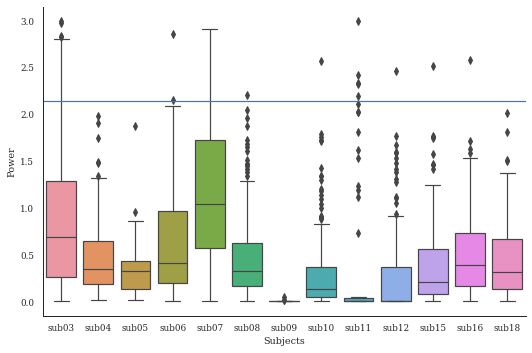

In [189]:
plt.figure(figsize=(10,4))

plt.tight_layout()
sns.set(font='serif')
sns.set_style("white", {
    "font.family": "serif",
    "font.serif": ["Times", "Palatino", "serif"]
})
sns.set_context("paper")


plot_y = 'C3_mu_power'

sns.catplot(x="sub", y=plot_y, kind="box", data=df_powers2, height=5, aspect=1.5)

mean = np.mean(df_powers[plot_y].values)
std = np.std(df_powers[plot_y].values)
plt.axhline(mean)
# plt.axhspan(mean-2*std, mean+2*std, color='r', alpha=0.1)

plt.xlabel('Subjects')
plt.ylabel('Power')

In [190]:
df_powers.shape

(2201, 979)

In [191]:
channel = 'C3'

mu_power_mean = np.mean(df_powers[channel + '_mu_power'])
mu_power_std = np.std(df_powers[channel + '_mu_power'])
beta_power_mean = np.mean(df_powers[channel + '_beta_power'])
beta_power_std = np.std(df_powers[channel + '_beta_power'])
gamma_power_mean = np.mean(df_powers[channel + '_gamma_power'])
gamma_power_std = np.std(df_powers[channel + '_gamma_power'])

def is_outlier(row):
    if row[channel + '_mu_power'] > mu_power_mean + 2 * mu_power_std or row[channel + '_mu_power'] < mu_power_mean - 2 * mu_power_std or row[channel + '_beta_power'] > beta_power_mean + 2 * beta_power_std or row[channel + '_beta_power'] < beta_power_mean - 2 * beta_power_std or row[channel + '_gamma_power'] > gamma_power_mean + 2 * gamma_power_std or row[channel + '_gamma_power'] < gamma_power_mean - 2 * gamma_power_std:
        return True
    return False

df_powers2 = []
for idx, row in tqdm_notebook(df_powers.iterrows(), total=df_powers.shape[0]):
    if is_outlier(row) == False:
        df_powers2.append(row)
df_powers2 = pd.DataFrame(df_powers2)
df_powers2.shape

(2119, 979)

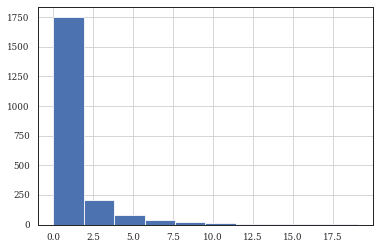

In [192]:
df_powers2['C3_mu_power'].hist()

In [193]:
def log_transform(column):
    mn = np.min(df_powers2[column])
    if mn >= 1:
        mn = 0
    else:
        mn = abs(mn) + 1
    df_powers2[column] = np.log(df_powers2[column]+mn)
    return df_powers2

df_powers2 = log_transform('C3_mu_power')
df_powers2 = log_transform('C3_beta_power')
df_powers2 = log_transform('C3_gamma_power')

df_powers2 = log_transform('LTM1_mu_power')
df_powers2 = log_transform('LTM1_beta_power')
df_powers2 = log_transform('LTM1_gamma_power')

df_powers2 = log_transform('C4_mu_power')
df_powers2 = log_transform('C4_beta_power')
df_powers2 = log_transform('C4_gamma_power')

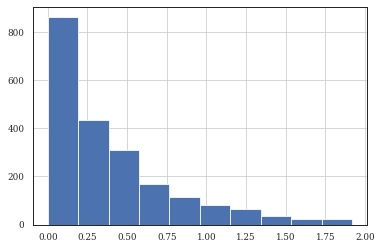

In [194]:
df_powers2['C3_beta_power'].hist()

In [195]:
df_powers2.to_excel('132-csd-clean-c3-v1.xlsx')